In [553]:
import numpy as np 
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from warnings import filterwarnings
from pandas.tseries.offsets import YearEnd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from tqdm import tqdm
from matplotlib import gridspec

filterwarnings('ignore')

# 데이터 전처리

In [527]:
# aa = pd.read_excel('./DATA/equity.xlsx', index_col=0, parse_dates=True)

In [541]:
# #aa = pd.read_excel('./DATA/코스피 총자본.xlsx', index_col=0, parse_dates=True)
# ticker = [x[1:] for x in aa.iloc[7].to_list()[1:]]
# tmp = aa.iloc[:,1:].iloc[12:]
# tmp.columns = ticker
# '''작년 회계정보는 올해 3월에 알 수 잇음'''
# tmp.index = [x+relativedelta(month=3, years=1) for x in pd.to_datetime(tmp.index)]
# tmp = tmp.asfreq('D').fillna(method='ffill').loc[df.index]
# tmp.to_pickle('./DATA/kospi_total_asset_tmp.pkl')



In [1494]:
aa = pd.read_excel('./DATA/BE.xlsx', index_col=0, parse_dates=True)


tt = aa.iloc[:,1:]
tick = [x[1:] for x in tt.iloc[7]]
cols = [x for x in tt.iloc[10]]

midx = pd.MultiIndex.from_tuples([(x, y) for x, y in zip(tick, cols)])

aaa = tt.iloc[12:,:]

aaa.columns=midx

aaa.index = pd.to_datetime(aaa.index)

aaa.index = [x+relativedelta(month=6, years=1) for x in pd.to_datetime(aaa.index)]

tmp = aaa.apply(lambda y: y.unstack().apply(lambda x: x[-1]-x[0]+x[1]-x[2], axis=1), axis=1).resample('m').last().fillna(method='ffill').iloc[:-1]
tmp

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000110,...,383220,383800,402340,403550,446070,450140,452260,453340,456040,457190
1982-06-30,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-07-31,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-08-31,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-09-30,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-10-31,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,4.545131e+14,4.251092e+11,4.244746e+14,9.210934e+10,1.184201e+12,3.479026e+13,2.110099e+12,3.107589e+12,2.257235e+12,9.856624e+13,...,1.324715e+12,9.607320e+11,7.484516e+12,5.736988e+11,2.111374e+11,NaN,NaN,NaN,NaN,NaN
2024-02-29,4.545131e+14,4.251092e+11,4.244746e+14,9.210934e+10,1.184201e+12,3.479026e+13,2.110099e+12,3.107589e+12,2.257235e+12,9.856624e+13,...,1.324715e+12,9.607320e+11,7.484516e+12,5.736988e+11,2.111374e+11,NaN,NaN,NaN,NaN,NaN
2024-03-31,4.545131e+14,4.251092e+11,4.244746e+14,9.210934e+10,1.184201e+12,3.479026e+13,2.110099e+12,3.107589e+12,2.257235e+12,9.856624e+13,...,1.324715e+12,9.607320e+11,7.484516e+12,5.736988e+11,2.111374e+11,NaN,NaN,NaN,NaN,NaN
2024-04-30,4.545131e+14,4.251092e+11,4.244746e+14,9.210934e+10,1.184201e+12,3.479026e+13,2.110099e+12,3.107589e+12,2.257235e+12,9.856624e+13,...,1.324715e+12,9.607320e+11,7.484516e+12,5.736988e+11,2.111374e+11,NaN,NaN,NaN,NaN,NaN


In [1509]:
tmp.loc[:m_ret.index[-1]].to_pickle('./DATA/check.pickle')

In [1495]:
tmp.to_pickle('./DATA/real_BE.pkl')

In [1464]:
tmp1 = tmp.shift(0)

In [1446]:
reg = pd.DataFrame(index=tmp.index, columns=tmp.columns)

In [1466]:
tttt = pd.concat([tmp1.iloc[np.where(tmp1.index.month>=6)], tmp2.iloc[np.where(tmp2.index.month<6)]])

In [1483]:
tttt = tttt.sort_index().iloc[:-7]

In [1463]:
tmp2 = tmp.shift(12)
tmp2

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000110,...,383220,383800,402340,403550,446070,450140,452260,453340,456040,457190
1982-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-30,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-31,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN


In [1406]:
df_eq = tmp

In [1503]:
#df      = pd.read_pickle('./DATA/kospi_adj_close.pkl').astype(float)
#df      = pd.read_pickle('./DATA/kospi_price_tmp.pkl').astype(float).loc['1982-03':]
#df_cap  = pd.read_pickle('./DATA/kospi_capital.pkl').astype(float)
#df_eq   = pd.read_pickle('./DATA/kospi_total_asset.pkl').astype(float)
df_ret = pd.read_pickle('./DATA/real_ret.pkl')

df_cap  = pd.read_pickle('./DATA/real_cap.pkl')
#df_eq   = pd.read_pickle('./DATA/kospi_total_asset_tmp.pkl').astype(float)
#df_eq = pd.read_pickle('./DATA/BE.pkl')
#df_eq = pd.read_pickle('./DATA/real_BE.pkl')

df_info = pd.read_pickle('./DATA/real_kospi_info.pkl')
df_code = pd.read_pickle('./DATA/real_kospi_code.pkl')

rf = pd.read_csv('./DATA/CD91.csv', index_col=0, parse_dates=True).apply(lambda x : x/100).resample('m').last()

In [917]:
#df_cap

## 수익률

일간 수익률을 통해 비정상적인 값을 수정함. <br>

러프하게 수정하지 않고 돌리는게 나을지도? (1년간의 모멘텀을 보고 투자한다고 가정 할 때 NaN값이 걸릴수도 있지 않을까?)

위에가 일간 필터링이고 <br>

아래는 걍 Close resample last 이용 해서 해버리기 

In [1504]:
def cal_mdd (ret_df):
    
    cum = ((ret_df+1).cumprod()-1)
    p = np.maximum.accumulate(cum)
    dd = (cum-p)/p
    return dd

#df_close_daily = df.copy()
'''코스피만 남기기'''
#df_close_daily = df_close_daily * df_info.replace('유가증권시장', 1).replace('비상장', np.NaN).replace('코스닥', np.NaN).replace('K-OTC', np.NaN).astype(float)
'''페니스톡 지우기'''
def filtering_penny (series):
    
    return np.where(series > 1000, series, np.NaN)

#df_close_daily = df_close_daily.apply(lambda x: filtering_penny(x), axis=0)

#mom_ret     = df_close_daily.resample('m').last().shift(1).pct_change(11).iloc[12:-1].replace(0, np.NaN)
#monthly_ret = df_close_daily.resample('m').last().pct_change().iloc[1:-1].replace(0, np.NaN)

'''시장, 업종 필터링'''
df_ret = df_ret * df_info.replace('유가증권시장', 1).replace('비상장', np.NaN).replace('코스닥', np.NaN).replace('K-OTC', np.NaN).astype(float)
df_ret = df_ret * pd.DataFrame(np.where(df_code == 'K', 0, 1.0), index=df_code.index, columns=df_code.columns)

df_eq = df_eq * df_info.replace('유가증권시장', 1).replace('비상장', np.NaN).replace('코스닥', np.NaN).replace('K-OTC', np.NaN).astype(float)
df_eq = df_eq * pd.DataFrame(np.where(df_code == 'K', 0, 1.0), index=df_code.index, columns=df_code.columns)

df_cap = df_cap * df_info.replace('유가증권시장', 1).replace('비상장', np.NaN).replace('코스닥', np.NaN).replace('K-OTC', np.NaN).astype(float)
df_cap = df_cap * pd.DataFrame(np.where(df_code == 'K', 0, 1.0), index=df_code.index, columns=df_code.columns)




#mom_ret     = df_ret.shift(1).r(11).iloc[12:-1].replace(0, np.NaN)
#monthly_ret = df_ret.pct_change().iloc[1:-1].replace(0, np.NaN)

mom_ret = df_ret.shift(1).rolling(11).apply(lambda x: (1+x).prod()-1)
monthly_ret = df_ret


In [232]:
# df_close_daily = df.loc[:, (slice(None), '종가')].copy()
# df_close_daily.columns = df_close_daily.columns.get_level_values(0)

# df_close_daily = df.copy()

# # df_close_ret = np.log(df_close_daily.astype(float)).diff().iloc[1:].copy()

# df_close_daily = df.copy()
# def filtering_penny (series):
    
#     return np.where(series > 1000, series, np.NaN)

# df_close_daily = df_close_daily.apply(lambda x: filtering_penny(x), axis=0)

# df_close_ret.loc[:'1995-03'] = np.where(abs(df_close_ret.loc[:'1995-03']) > 0.041, np.NaN, df_close_ret.loc[:'1995-03'])
# df_close_ret.loc['1995-04':'1996-10'] = np.where(abs(df_close_ret.loc['1995-04':'1996-10']) > 0.061, np.NaN, df_close_ret.loc['1995-04':'1996-10'])
# df_close_ret.loc['1996-11':'1998-02'] = np.where(abs(df_close_ret.loc['1996-11':'1998-02']) > 0.081, np.NaN, df_close_ret.loc['1996-11':'1998-02'])
# df_close_ret.loc['1998-03':'1998-11'] = np.where(abs(df_close_ret.loc['1998-03':'1998-11']) > 0.121, np.NaN, df_close_ret.loc['1998-03':'1998-11'])
# df_close_ret.loc['1998-12':'2015-05'] = np.where(abs(df_close_ret.loc['1998-12':'2015-05']) > 0.151, np.NaN, df_close_ret.loc['1998-12':'2015-05'])
# df_close_ret.loc['2015-06':] = np.where(abs(df_close_ret.loc['2015-06':]) > 0.301, np.NaN, df_close_ret.loc['2015-06':])

# df_close_ret


# '''월별 수익률'''
# monthly_ret = (df_close_ret).resample('M').agg(lambda x: (x+1).prod() - 1)   # 월단위로 agg한다음 그 안에 값에 대해서 cumprod를 계산하는 방식. 일별 to 월별수익률
# monthly_ret = monthly_ret.iloc[:-1] # 2023년 6월 데이터는 아직 모두 존재하지 않음

# monthly_ret = monthly_ret.replace(0, np.NaN)

# '''모멘텀'''
# mom_ret = monthly_ret.shift(1).rolling(11).apply(lambda x: (x+1).cumprod()-1, raw=False) # 누적수익률 방식
# mom_ret = mom_ret.replace(0, np.NaN)

# monthly_ret.tail()

In [156]:
# df_mm_close = df_close_daily.resample('m').last()

# for x in tqdm(df_mm_close.columns):
    
#     aa = df_mm_close[x]
#     year_dict = {}
    
#     for year in df_mm_close.index.year.unique():
#     #year = str(df_mm_close.index.year.unique()[0])
#         year_list = []
#         year = str(year)
        
#         for check_idx in aa.loc[year].index:
            
#             status=0
            
#             if aa.loc[year].loc[check_idx] < df_mm_close.loc[check_idx].quantile(0.05):
#                 status = 1
#             else:
#                 pass

#         if status==1:
#             year_list.append(aa)
        
#     year_dict[year] = year_list    


# 모멘텀 수익률, 월별 수익률

In [1180]:
# mom_ret     = df_close_daily.resample('m').last().shift(1).pct_change(11).iloc[12:].replace(0, np.NaN)
# monthly_ret = df_close_daily.resample('m').last().pct_change().iloc[1:].replace(0, np.NaN)

# df_close_daily = df.copy()

# def filtering_penny (series):
    
#     return np.where(series > 1000, series, np.NaN)

# df_close_daily = df_close_daily.apply(lambda x: filtering_penny(x), axis=0)

# mom_ret     = df_close_daily.resample('m').last().shift(1).pct_change(11).iloc[12:].replace(0, np.NaN)
# monthly_ret = df_close_daily.resample('m').last().pct_change().iloc[1:].replace(0, np.NaN)

pnl_ret_list  = []
ivst_idx_list = []
long_tick_list = []
short_tick_list = []
s_ret_list = []
l_ret_list = []

for num in range(len(mom_ret)-1):
    series = mom_ret.iloc[num]

    date_idx = series.name
    ivst_idx = monthly_ret.index[np.where(monthly_ret.index==date_idx)[0][0] + 1]

    long_tick = series[series > series.quantile(0.9)].index.to_list()
    short_tick = series[series < series.quantile(0.1)].index.to_list()
    #short_tick = series[series < series.quantile(0.2)].index.to_list()

    long_ret = monthly_ret.loc[ivst_idx, long_tick].mean()
    short_ret = monthly_ret.loc[ivst_idx, short_tick].mean()
        
    pnl_ret = monthly_ret.loc[ivst_idx, long_tick].mean() - monthly_ret.loc[ivst_idx, short_tick].mean()
        
    pnl_ret_list.append(pnl_ret)
    ivst_idx_list.append(ivst_idx)
    long_tick_list.append(long_tick)
    short_tick_list.append(short_tick)
    s_ret_list.append(short_ret)
    l_ret_list.append(long_ret)
    

mom_pnl = pd.DataFrame(index=ivst_idx_list, \
                       data=pd.DataFrame([pnl_ret_list, long_tick_list, short_tick_list, s_ret_list, l_ret_list]).T.values,\
                       columns=['mom_pnl', 'long_idx', 'short_idx', 's_ret', 'l_ret'])

In [1181]:
mom_pnl

,mom_pnl,long_idx,short_idx,s_ret,l_ret
1980-02-29,NaN,[],[],NaN,NaN
1980-03-31,NaN,[],[],NaN,NaN
1980-04-30,NaN,[],[],NaN,NaN
1980-05-31,NaN,[],[],NaN,NaN
1980-06-30,NaN,[],[],NaN,NaN
...,...,...,...,...,...
2023-01-31,-0.045765,"[051910, 003670, 033780, 329180, 010130, 00983...","[035420, 035720, 352820, 259960, 361610, 40234...",0.104055,0.05829
2023-02-28,0.037105,"[003670, 033780, 009830, 005070, 012450, 04781...","[035420, 361610, 302440, 251270, 020150, 00099...",-0.014587,0.022517
2023-03-31,0.140364,"[373220, 051910, 006400, 003670, 033780, 00983...","[259960, 361610, 302440, 251270, 006360, 13731...",-0.033594,0.10677
2023-04-30,-0.005863,"[373220, 051910, 006400, 003670, 033780, 00983...","[361610, 302440, 251270, 006360, 137310, 37550...",0.024482,0.018619


<AxesSubplot:>

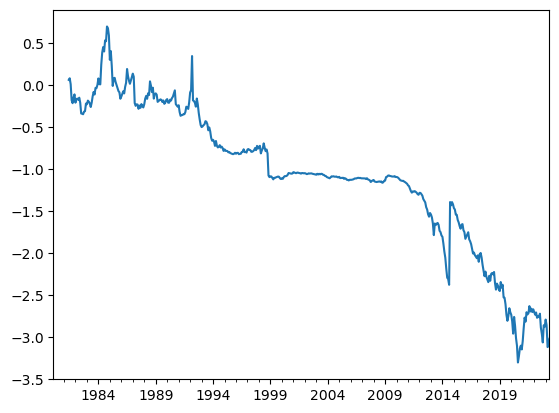

In [1182]:
'''1990년 부터'''
((mom_pnl.iloc[:,0]+1).cumprod()-1).plot()

In [1183]:
# mom_ret     = df_close_daily.resample('m').last().shift(1).pct_change(11).iloc[12:].replace(0, np.NaN)
# monthly_ret = df_close_daily.resample('m').last().pct_change().iloc[1:].replace(0, np.NaN)


pnl_ret_list  = []
ivst_idx_list = []
long_tick_list = []
short_tick_list = []
s_ret_list = []
l_ret_list = []

for num in range(len(mom_ret)-1):
    series = mom_ret.iloc[num]

    date_idx = series.name
    ivst_idx = monthly_ret.index[np.where(monthly_ret.index==date_idx)[0][0] + 1]

    long_tick = series[series > series.quantile(0.9)].index.to_list()
    short_tick = series[series < series.quantile(0.1)].index.to_list()
    #short_tick = series[series < series.quantile(0.2)].index.to_list()

    long_ret = monthly_ret.loc[ivst_idx, long_tick].mean()
    short_ret = monthly_ret.loc[ivst_idx, short_tick].mean()
        
    pnl_ret = monthly_ret.loc[ivst_idx, long_tick].mean() - monthly_ret.loc[ivst_idx, short_tick].mean()
        
    pnl_ret_list.append(pnl_ret)
    ivst_idx_list.append(ivst_idx)
    long_tick_list.append(long_tick)
    short_tick_list.append(short_tick)
    s_ret_list.append(short_ret)
    l_ret_list.append(long_ret)
    

mom_pnl = pd.DataFrame(index=ivst_idx_list, \
                       data=pd.DataFrame([pnl_ret_list, long_tick_list, short_tick_list, s_ret_list, l_ret_list]).T.values,\
                       columns=['mom_pnl', 'long_idx', 'short_idx', 's_ret', 'l_ret'])

In [1184]:
mom_pnl

,mom_pnl,long_idx,short_idx,s_ret,l_ret
1980-02-29,NaN,[],[],NaN,NaN
1980-03-31,NaN,[],[],NaN,NaN
1980-04-30,NaN,[],[],NaN,NaN
1980-05-31,NaN,[],[],NaN,NaN
1980-06-30,NaN,[],[],NaN,NaN
...,...,...,...,...,...
2023-01-31,-0.045765,"[051910, 003670, 033780, 329180, 010130, 00983...","[035420, 035720, 352820, 259960, 361610, 40234...",0.104055,0.05829
2023-02-28,0.037105,"[003670, 033780, 009830, 005070, 012450, 04781...","[035420, 361610, 302440, 251270, 020150, 00099...",-0.014587,0.022517
2023-03-31,0.140364,"[373220, 051910, 006400, 003670, 033780, 00983...","[259960, 361610, 302440, 251270, 006360, 13731...",-0.033594,0.10677
2023-04-30,-0.005863,"[373220, 051910, 006400, 003670, 033780, 00983...","[361610, 302440, 251270, 006360, 137310, 37550...",0.024482,0.018619


In [1036]:
(mom_pnl.iloc[:,0].loc['2000':]+1).cumprod()-1

2000-01-31    -0.073831
2000-02-29    -0.020143
2000-03-31    -0.199644
2000-04-30    -0.290755
2000-05-31    -0.285475
                ...    
2023-01-31    14.113682
2023-02-28    14.674476
2023-03-31    16.874604
2023-04-30      16.7698
2023-05-31    16.040856
Name: mom_pnl, Length: 281, dtype: object

In [1035]:
(mom_pnl.iloc[:,0].loc['2001':]+1).cumprod()-1

2001-01-31    -0.296986
2001-02-28    -0.246732
2001-03-31    -0.121936
2001-04-30     -0.07586
2001-05-31    -0.209941
                ...    
2023-01-31    32.738768
2023-02-28    33.990645
2023-03-31    38.902064
2023-04-30    38.668106
2023-05-31     37.04086
Name: mom_pnl, Length: 269, dtype: object

<AxesSubplot:>

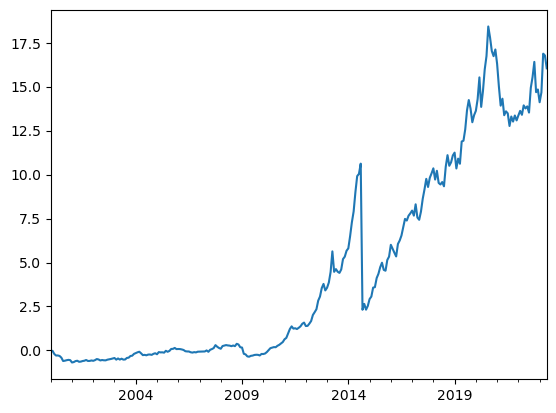

In [1031]:
'''1990년 부터'''
((mom_pnl.iloc[:,0].loc['2000':]+1).cumprod()-1).plot()

<AxesSubplot:>

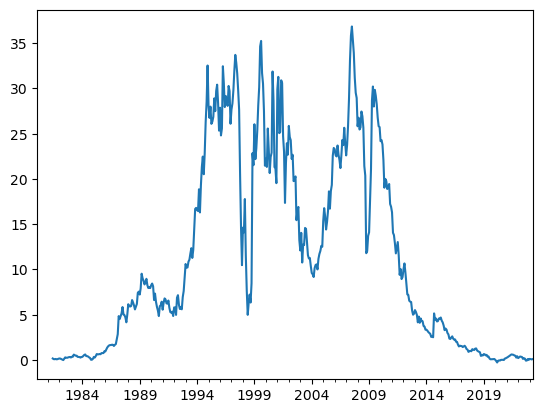

In [1002]:
'''2000년 2월 부터 숏 온니'''
((mom_pnl.iloc[:,3]+1).cumprod()-1).plot()

<AxesSubplot:>

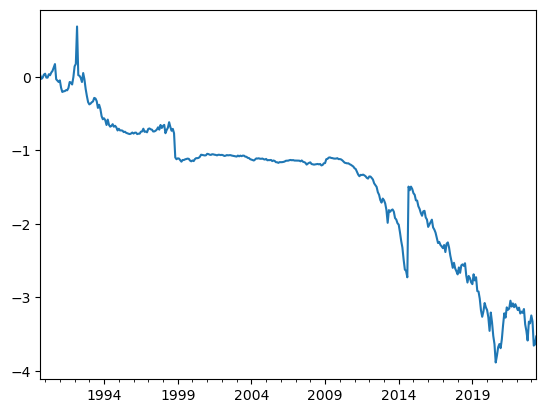

In [1003]:
'''2000년 2월 부터'''
((mom_pnl.iloc[115:,0]+1).cumprod()-1).plot()

<AxesSubplot:>

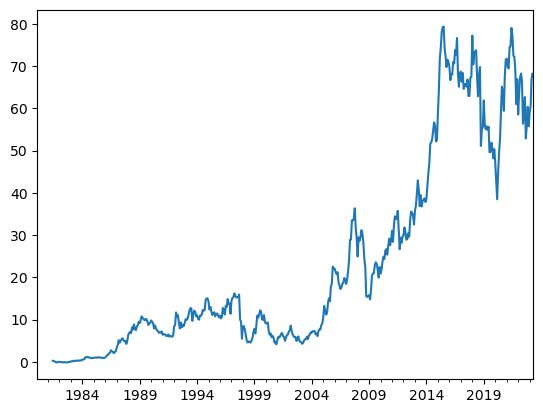

In [1004]:
'''1990년 부터 롱온니'''
((mom_pnl.iloc[:,4]+1).cumprod()-1).plot()

In [1005]:
pnl_ret_list  = []
ivst_idx_list = []
long_tick_list = []
short_tick_list = []
s_ret_list = []
l_ret_list = []

for num in range(len(mom_ret)-1):
    series = mom_ret.iloc[num]

    date_idx = series.name
    ivst_idx = monthly_ret.index[np.where(monthly_ret.index==date_idx)[0][0] + 1]

    long_tick = series[series > series.quantile(0.9)].index.to_list()
    short_tick = series[series < series.quantile(0.1)].index.to_list()
    #short_tick = series[series < series.quantile(0.2)].index.to_list()

    long_ret = monthly_ret.loc[ivst_idx, long_tick].mean()
    short_ret = monthly_ret.loc[ivst_idx, short_tick].mean()
        
    pnl_ret = monthly_ret.loc[ivst_idx, long_tick].mean() - monthly_ret.loc[ivst_idx, short_tick].mean()
        
    pnl_ret_list.append(pnl_ret)
    ivst_idx_list.append(ivst_idx)
    long_tick_list.append(long_tick)
    short_tick_list.append(short_tick)
    s_ret_list.append(short_ret)
    l_ret_list.append(long_ret)
    

mom_pnl = pd.DataFrame(index=ivst_idx_list, \
                       data=pd.DataFrame([pnl_ret_list, long_tick_list, short_tick_list, s_ret_list, l_ret_list]).T.values,\
                       columns=['mom_pnl', 'long_idx', 'short_idx', 's_ret', 'l_ret'])

### cf) filtered

In [751]:
def series_cond (series):
    
    return pd.Series(np.where(series < series.quantile(0.05), np.NaN, series), index=series.index, name=series.name)

aa = df_close_daily.resample('m').last()
df_close_filtered = aa.apply(lambda x: series_cond(x), axis=1)


# def series_cond (series):
    
#     return pd.Series(np.where(series < 1000, np.NaN, series), index=series.index, name=series.name)

# aa = df_close_daily.resample('m').last()
# df_close_filtered = aa.apply(lambda x: series_cond(x), axis=1)


In [752]:
'''일단 결과보려 위에서 소팅한거 씀'''
# mom_ret_filtered     = df_close_filtered.shift(1).pct_change(11).iloc[12:].replace(0, np.NaN)
# monthly_ret_filtered = df_close_filtered.pct_change().iloc[1:].replace(0, np.NaN)

mom_ret_filtered = mom_ret
monthly_ret_filtered = monthly_ret

pnl_ret_list  = []
ivst_idx_list = []
long_tick_list = []
short_tick_list = []
s_ret_list = []
l_ret_list = []

for num in range(len(mom_ret_filtered)-1):
    series = mom_ret_filtered.iloc[num]

    date_idx = series.name
    ivst_idx = monthly_ret_filtered.index[np.where(monthly_ret_filtered.index==date_idx)[0][0] + 1]

    long_tick = series[series > series.quantile(0.9)].index.to_list()
    short_tick = series[series < series.quantile(0.1)].index.to_list()
    #short_tick = series[series < series.quantile(0.2)].index.to_list()

    long_ret = monthly_ret_filtered.loc[ivst_idx, long_tick].mean()
    short_ret = monthly_ret_filtered.loc[ivst_idx, short_tick].mean()
        
    pnl_ret = long_ret #- short_ret
        
    pnl_ret_list.append(pnl_ret)
    ivst_idx_list.append(ivst_idx)
    long_tick_list.append(long_tick)
    short_tick_list.append(short_tick)
    s_ret_list.append(short_ret)
    l_ret_list.append(long_ret)
    

mom_pnl_filtered = pd.DataFrame(index=ivst_idx_list, \
                       data=pd.DataFrame([pnl_ret_list, long_tick_list, short_tick_list, s_ret_list, l_ret_list]).T.values,\
                       columns=['mom_pnl', 'long_idx', 'short_idx', 's_ret', 'l_ret'])

((mom_pnl_filtered.iloc[100:,4]+1).cumprod()-1)[-1]

2.0397080017190765

In [532]:
mom_pnl_filtered

,mom_pnl,long_idx,short_idx,s_ret,l_ret
1983-04-30,0.186331,"[000210, 001470, 002780, 003480, 004060, 00496...","[000210, 001470, 001880, 002780, 003480, 00406...",0.193556,0.186331
1983-05-31,-0.044704,"[001260, 001880, 002780, 003070, 003480, 00496...","[000210, 001260, 001880, 002780, 003070, 00348...",-0.049948,-0.044704
1983-06-30,-0.056358,"[001880, 002780, 004000, 004960, 005940, 00596...","[000210, 001880, 002780, 004000, 004960, 00594...",-0.055216,-0.056358
1983-07-31,-0.000678,"[001260, 001470, 003070, 003960, 004060, 00496...","[000210, 001260, 001470, 003070, 003960, 00406...",0.001635,-0.000678
1983-08-31,-0.10487,"[000210, 000300, 002780, 003070, 004060, 00496...","[000210, 000300, 001260, 002780, 003070, 00406...",-0.114602,-0.10487
...,...,...,...,...,...
2023-02-28,-0.00739,"[000990, 001140, 001210, 001750, 001820, 00188...","[000990, 001140, 001210, 001750, 001820, 00188...",-0.009038,-0.00739
2023-03-31,-0.030845,"[001140, 001210, 001470, 001750, 001880, 00207...","[001140, 001210, 001470, 001750, 001880, 00207...",-0.029637,-0.030845
2023-04-30,0.019818,"[000390, 001140, 001210, 001470, 001880, 00207...","[000390, 001140, 001210, 001470, 001880, 00207...",0.019818,0.019818
2023-05-31,0.035124,"[000230, 001020, 001140, 001210, 001250, 00147...","[000230, 001020, 001140, 001210, 001250, 00147...",0.035087,0.035124


<AxesSubplot:>

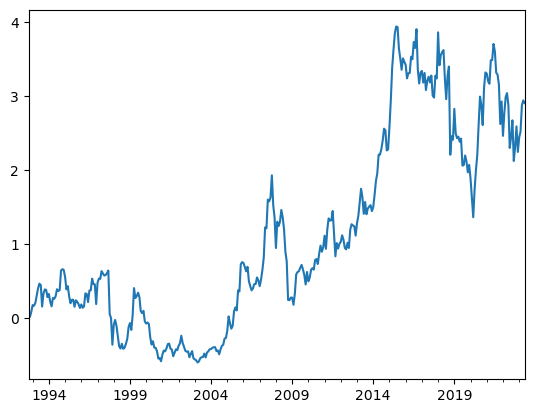

In [753]:
'''1990년 부터'''
((mom_pnl_filtered.iloc[135:,4]+1).cumprod()-1).plot()

### 기본 모멘텀 분위별 결과 뽑기

In [1185]:
# 8분위로? 10분위로?

# 10 decile의 경우

for x in zip(np.linspace(0, 1, 11)[:-1][::-1], np.linspace(0, 1, 11)[1:][::-1]):
    print( x[0], x[1] )

0.9 1.0
0.8 0.9
0.7000000000000001 0.8
0.6000000000000001 0.7000000000000001
0.5 0.6000000000000001
0.4 0.5
0.30000000000000004 0.4
0.2 0.30000000000000004
0.1 0.2
0.0 0.1


In [1186]:
# mom_ret_filtered     = df_close_filtered.shift(1).pct_change(11).iloc[12:].replace(0, np.NaN).loc['1999':]
# monthly_ret_filtered = df_close_filtered.pct_change().iloc[1:].replace(0, np.NaN).loc['1999':]

mom_ret_filtered = mom_ret.loc['2001':]
monthly_ret_filtered = monthly_ret.loc['2001':]

reg_table = pd.DataFrame(index=np.arange(0, 10)+1, columns=['CumRet', 'AnnRet(%)', 'AnnStd(%)', 'sharpe'])

for decile_num, x in tqdm(enumerate(zip(np.linspace(0, 1, 11)[:-1][::-1], np.linspace(0, 1, 11)[1:][::-1]))):
    
    decile_num = decile_num+1
    low_line, up_line = x[0], x[1]
    
    pnl_ret_list  = []
    ivst_idx_list = []
    long_tick_list = []
    short_tick_list = []
    s_ret_list = []
    l_ret_list = []

    for num in range(len(mom_ret_filtered)-1):
        series = mom_ret_filtered.iloc[num]

        date_idx = series.name
        ivst_idx = monthly_ret_filtered.index[np.where(monthly_ret_filtered.index==date_idx)[0][0] + 1]

        long_tick = series[(series > series.quantile(low_line)) & (series <= series.quantile(up_line))].index.to_list()
        short_tick = series[series < series.quantile(0.1)].index.to_list()
        #short_tick = series[series < series.quantile(0.2)].index.to_list()

        long_ret = monthly_ret_filtered.loc[ivst_idx, long_tick].mean()
        short_ret = monthly_ret_filtered.loc[ivst_idx, short_tick].mean()
            
        pnl_ret = long_ret - 0 #- short_ret
            
        pnl_ret_list.append(pnl_ret)
        ivst_idx_list.append(ivst_idx)
        long_tick_list.append(long_tick)
        short_tick_list.append(short_tick)
        s_ret_list.append(short_ret)
        l_ret_list.append(long_ret)
        

    mom_pnl_filtered = pd.DataFrame(index=ivst_idx_list, \
                        data=pd.DataFrame([pnl_ret_list, long_tick_list, short_tick_list, s_ret_list, l_ret_list]).T.values,\
                        columns=['mom_pnl', 'long_idx', 'short_idx', 's_ret', 'l_ret'])

    cum_ret = ((mom_pnl_filtered.iloc[:,0]+1).cumprod()-1)[-1]
    ann_ret = np.round(mom_pnl_filtered.iloc[:,0].mean() * 12 * 100, 2)
    ann_std = np.round(mom_pnl_filtered.iloc[:,0].std() * np.sqrt(12) * 100, 2)
    
    #sharpe = ((mom_pnl_filtered.iloc[:,[0]] - rf.loc[mom_pnl_filtered.index].apply(lambda x: x/12).to_numpy()).mean()/mom_pnl_filtered.iloc[:,[0]].std()).item()
    
    # reg_table.loc[decile_num, ['CumRet', 'AnnRet(%)', 'AnnStd(%)', 'sharpe']] = [cum_ret, ann_ret, ann_std, sharpe]
    reg_table.loc[decile_num, ['CumRet', 'AnnRet(%)', 'AnnStd(%)']] = [cum_ret, ann_ret, ann_std]

10it [00:03,  2.55it/s]


In [1187]:
reg_table

,CumRet,AnnRet(%),AnnStd(%),sharpe
1,10.087181,14.54,27.24,NaN
2,38.925011,19.17,22.69,NaN
3,102.34495,23.29,21.8,NaN
4,73.648093,21.76,21.48,NaN
5,25.502282,17.06,21.47,NaN
6,13.285427,13.97,20.0,NaN
7,13.552253,14.18,20.52,NaN
8,7.584068,12.34,22.98,NaN
9,6.044576,11.79,24.32,NaN
10,-0.468466,2.94,34.95,NaN


# SMB, HML Port로 비교

먼저 small, big, growth 등 나누기

인덱스 설정 (1999-01-01)

In [1468]:
'''날짜 건들면 손모가지 날아가분다잉'''
time_idx = monthly_ret.loc['1994-03-01':].index

m_ret = monthly_ret.loc[time_idx]
'''SMB 이슈로 일케 함'''
#m_ret = np.log(df_close_daily).resample('m').last().diff().iloc[1:].loc[time_idx]

'SMB 이슈로 일케 함'

In [1435]:
df_cap

,005930,373220,000660,207940,051910,006400,005380,035420,000270,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
1980-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,3.641567e+14,1.219140e+14,6.442821e+13,5.644098e+13,4.870872e+13,4.710370e+13,3.568259e+13,3.321994e+13,2.707827e+13,2.541366e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,3.617688e+14,1.223820e+14,6.508341e+13,5.501750e+13,4.800279e+13,4.786011e+13,3.729300e+13,3.420423e+13,3.052386e+13,2.689365e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,3.820661e+14,1.366560e+14,6.450101e+13,5.608511e+13,5.026175e+13,5.054193e+13,3.902756e+13,3.313792e+13,3.283443e+13,3.112221e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30,3.910208e+14,1.359540e+14,6.515621e+13,5.558689e+13,5.223833e+13,4.751629e+13,4.177747e+13,3.154664e+13,3.425320e+13,3.188335e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1474]:
tttt

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000110,...,383220,383800,402340,403550,446070,450140,452260,453340,456040,457190
1982-06-30,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-07-31,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-08-31,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-09-30,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-10-31,5.417531e+12,2.610273e+10,6.689833e+12,3.769297e+10,5.520660e+10,4.483477e+10,1.434358e+11,7.104890e+10,3.256560e+10,5.891051e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN


In [1475]:
df_cap.loc[tttt.index]

KeyError: "[Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')] not in index"

In [1497]:
tttt

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000110,...,383220,383800,402340,403550,446070,450140,452260,453340,456040,457190
1982-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30,4.323447e+14,4.107441e+11,3.975308e+14,9.792322e+10,1.269060e+12,2.742187e+13,2.129684e+12,3.424478e+12,2.208248e+12,8.681650e+13,...,1.068455e+12,8.920310e+11,7.090626e+12,4.198787e+11,NaN,NaN,NaN,NaN,NaN,NaN


In [1502]:
df_cap.loc[tttt.index].to_pickle('./DATA/real_cap.pkl')

In [1500]:
# df_eq = df_eq * df_info.replace('유가증권시장', 1).replace('비상장', np.NaN).replace('코스닥', np.NaN).replace('K-OTC', np.NaN).astype(float).loc[df_eq.index]
# df_cap = df_cap.loc[df_info.index] * df_info.replace('유가증권시장', 1).replace('비상장', np.NaN).replace('코스닥', np.NaN).replace('K-OTC', np.NaN).astype(float)

value_ratio = tttt / df_cap.loc[tttt.index]

'''Cap의 중간'''
small = df_cap.apply(lambda x: x.replace(0, np.NaN).dropna()[x.replace(0, np.NaN).dropna()<x.replace(0, np.NaN).dropna().median()].index.to_list(), axis=1).dropna().loc[time_idx]
big = df_cap.apply(lambda x: x.replace(0, np.NaN).dropna()[x.replace(0, np.NaN).dropna()>=x.replace(0, np.NaN).dropna().median()].index.to_list(), axis=1).dropna().loc[time_idx]

'''가치는 equity/cap 한 것을 가지고 만듦'''
growth = value_ratio.apply(lambda x: x.replace(0, np.NaN).dropna()[x.replace(0, np.NaN).dropna()<x.replace(0, np.NaN).dropna().quantile(0.3)].index.to_list(), axis=1).dropna().loc[time_idx]
neutral = value_ratio.apply(lambda x: x.replace(0, np.NaN).dropna()[(x.replace(0, np.NaN).dropna()>=x.replace(0, np.NaN).dropna().quantile(0.3))& x.replace(0, np.NaN).dropna()<x.replace(0, np.NaN).dropna().quantile(0.7)].index.to_list(), axis=1).dropna().loc[time_idx]
value = value_ratio.apply(lambda x: x.replace(0, np.NaN).dropna()[x.replace(0, np.NaN).dropna()>=x.replace(0, np.NaN).dropna().quantile(0.7)].index.to_list(), axis=1).dropna().loc[time_idx]

<AxesSubplot:>

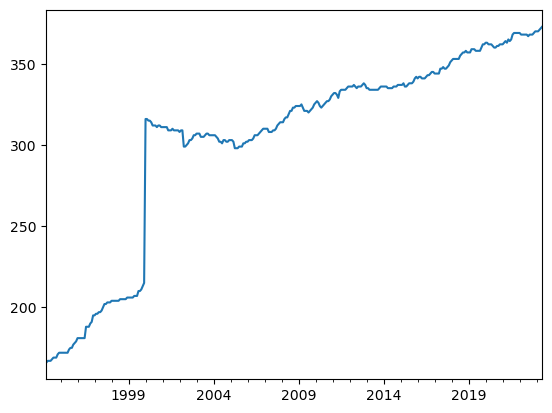

In [1501]:
'''가변적임!'''
pd.DataFrame(small).apply(lambda x: len(x[0]), axis=1).plot()

In [1486]:
from tqdm import tqdm

print(set(small.index) - set(m_ret.index))
'''위에 공집합이여야, 아래 돌아감'''

set()


'위에 공집합이여야, 아래 돌아감'

In [1487]:
SMB_list = []
HML_list = []
idx_list = []

for idx in tqdm(m_ret.index):
    
    idx_list.append(idx)
    
    '''equal'''

    # bv = m_ret.loc[idx].loc[list(set(big.loc[idx]) & set(value.loc[idx]))].mean()
    # bn = m_ret.loc[idx].loc[list(set(big.loc[idx]) & set(neutral.loc[idx]))].mean()
    # bg = m_ret.loc[idx].loc[list(set(big.loc[idx]) & set(growth.loc[idx]))].mean()
    # sv = m_ret.loc[idx].loc[list(set(small.loc[idx]) & set(value.loc[idx]))].mean()
    # sn = m_ret.loc[idx].loc[list(set(small.loc[idx]) & set(neutral.loc[idx]))].mean()
    # sg = m_ret.loc[idx].loc[list(set(small.loc[idx]) & set(growth.loc[idx]))].mean()
    
    '''Value Weight'''
    
    bv = m_ret.loc[idx].loc[list(set(big.loc[idx]) & set(value.loc[idx]))] @ \
                        df_cap[list(set(big.loc[idx]) & set(value.loc[idx]))].loc[idx]/df_cap[list(set(big.loc[idx]) & set(value.loc[idx]))].loc[idx].sum().T
    bn = m_ret.loc[idx].loc[list(set(big.loc[idx]) & set(neutral.loc[idx]))] @ \
                        df_cap[list(set(big.loc[idx]) & set(neutral.loc[idx]))].loc[idx]/df_cap[list(set(big.loc[idx]) & set(neutral.loc[idx]))].loc[idx].sum().T
    bg = m_ret.loc[idx].loc[list(set(big.loc[idx]) & set(growth.loc[idx]))] @ \
                        df_cap[list(set(big.loc[idx]) & set(growth.loc[idx]))].loc[idx]/df_cap[list(set(big.loc[idx]) & set(growth.loc[idx]))].loc[idx].sum().T
    sv = m_ret.loc[idx].loc[list(set(small.loc[idx]) & set(value.loc[idx]))] @ \
                        df_cap[list(set(small.loc[idx]) & set(value.loc[idx]))].loc[idx]/df_cap[list(set(small.loc[idx]) & set(value.loc[idx]))].loc[idx].sum().T
    sn = m_ret.loc[idx].loc[list(set(small.loc[idx]) & set(neutral.loc[idx]))] @ \
                        df_cap[list(set(small.loc[idx]) & set(neutral.loc[idx]))].loc[idx]/df_cap[list(set(small.loc[idx]) & set(neutral.loc[idx]))].loc[idx].sum().T
    sg = m_ret.loc[idx].loc[list(set(small.loc[idx]) & set(growth.loc[idx]))] @ \
                        df_cap[list(set(small.loc[idx]) & set(growth.loc[idx]))].loc[idx]/df_cap[list(set(small.loc[idx]) & set(growth.loc[idx]))].loc[idx].sum().T
    
    

    SMB = (sv+sn+sg)/3 - (bv+bn+bg)/3
    HML = (sv+bv)/2 - (sg+bg)/2
    
    SMB_list.append(SMB)
    HML_list.append(HML)


100%|██████████| 351/351 [00:02<00:00, 139.66it/s]


## SMB, HML 집합 비교하고, RP, rf 추가

(<AxesSubplot:>, <AxesSubplot:>)

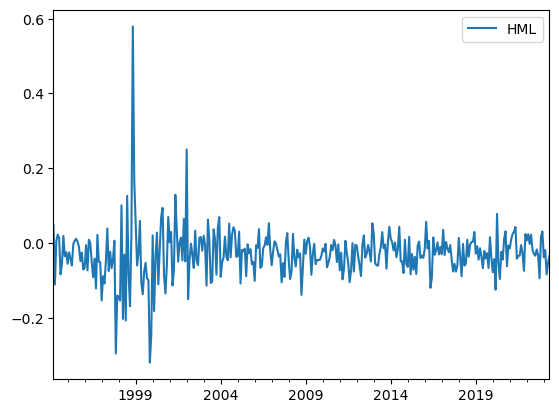

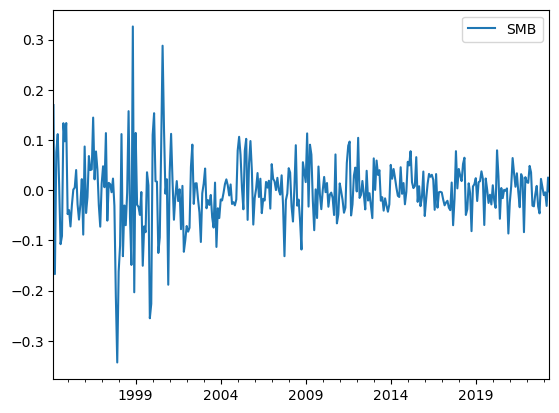

In [1488]:
rf = pd.read_csv('./DATA/CD91.csv', index_col=0, parse_dates=True).apply(lambda x : x/100).resample('m').last()

SMB = pd.DataFrame(SMB_list, index=m_ret.index, columns=['SMB']).dropna().loc[rf.index[0]:]
#SMB = pd.DataFrame(pd.concat([SMB, rf], axis=1).dropna().apply(lambda x: x[0]-x[1]/12, axis=1), columns=['SMB'])

HML = pd.DataFrame(HML_list, index=m_ret.index, columns=['HML']).dropna().loc[rf.index[0]:]
#HML = pd.DataFrame(pd.concat([HML, rf], axis=1).dropna().apply(lambda x: x[0]-x[1]/12, axis=1), columns=['HML'])

rf = rf.loc[SMB.index]

mkt = pd.read_csv('./DATA/kospi_index.csv', index_col=0, parse_dates=True).resample('m').last().pct_change().loc[SMB.index]
mkt = pd.DataFrame(pd.concat([mkt, rf], axis=1).dropna().apply(lambda x: x[0]-x[1]/12, axis=1), columns=['MKT'])

HML.plot(), SMB.plot()

In [1489]:
HML

,HML
1994-03-31,0.046977
1994-04-30,-0.110904
1994-05-31,0.005094
1994-06-30,0.022187
1994-07-31,0.013784
...,...
2023-01-31,-0.038248
2023-02-28,-0.019341
2023-03-31,-0.084027
2023-04-30,-0.052194


# Rolling Regression

In [597]:
resid_list = []

#m_ret = df_close_daily.resample('m').last().pct_change().iloc[1:].replace(0, np.NaN)

for name in tqdm(m_ret.columns):

    aa = name
    exret = pd.DataFrame(pd.concat([m_ret[aa], rf],axis=1).dropna().apply(lambda x: x[0] - x[1], axis=1), columns=['ExRet'])


    '''전체기간용'''
    setup_df = pd.concat([exret, mkt, SMB, HML], axis=1).dropna().iloc[35:]
    
    '''t-1~t-36롤링용'''
    setup_df_for_roll = pd.concat([exret, mkt, SMB, HML], axis=1).dropna().shift(1).dropna()
    
    y = setup_df_for_roll.iloc[:,[0]]
    y_real = setup_df.iloc[:,[0]]
    #x = sm.add_constant(setup_df_for_roll.iloc[:, 1:])
    x = setup_df_for_roll.iloc[:, 1:]
    
    try:
        reg = RollingOLS(y, x, 35).fit()

        coef_df = reg.params

        resid = (y_real - pd.DataFrame(np.diag(np.dot(setup_df.iloc[:,1:], coef_df.T)), index=setup_df.index, columns=['PRED']).values).rename(columns={'ExRet':aa})
        resid_list.append(resid)

    except:
        
        resid = pd.DataFrame(index=setup_df.index, columns=[aa])
        resid_list.append(resid)
        pass
    
resid_df = pd.concat(resid_list, axis=1)

resid_standard = resid_df.apply(lambda x: x.dropna().shift(1).rolling(11).sum()/x.dropna().shift(1).rolling(11).std(), axis=0)
resid_df

100%|██████████| 1102/1102 [00:16<00:00, 66.37it/s] 


,000010,000020,000030,000040,000050,000060,000070,000080,000100,000110,...,383220,383800,402340,403550,446070,450140,452260,453340,456040,457190
1997-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,NaN,-0.103246,NaN,NaN,-0.092392,-0.041679,-0.061257,-0.066338,-0.257456,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,NaN,-0.055359,NaN,NaN,-0.009301,NaN,0.066754,-0.126758,-0.008065,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,NaN,-0.151630,NaN,NaN,-0.048509,NaN,-0.089611,-0.119718,-0.130090,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30,NaN,-0.047375,NaN,NaN,-0.023211,NaN,-0.024416,-0.045374,0.055657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


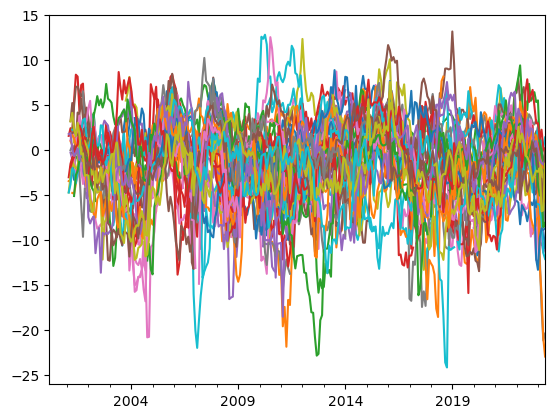

In [599]:
for x in resid_standard.columns[0:50]:
    resid_standard[x].plot()

시간별 정규화

In [ ]:
# '''Time Series Standardize'''
# resid_df_stan_t = resid_df.apply(lambda x: (x-x.mean())/x.std(), axis=1)
# for x in resid_df_stan_t.columns[0:50]:
#     resid_df_stan_t[x].plot()

기업별 정규화

In [ ]:
# '''cross sectional standardize'''
# resid_df_stan_f = resid_df.apply(lambda x: (x-x.mean())/x.std(), axis=0)
# for x in resid_df_stan_f.columns[0:50]:
#     resid_df_stan_f[x].plot()

# Residual Portfolio 만들기

t-1 ~ t-12의 residual 변화분을가지고 rank, 상위 10% 롱, 하위 10% 숏

2004년부터 진행됨..? 36이니, 3년 빼면.. 맞는거같기도

In [614]:
resid_mom_ret_list_1 = []
resid_mom_ret_date_list_1 = []
top_resid_num = []

monthly_resid = resid_standard.iloc[np.where(resid_standard.sum(axis=1) != 0)].iloc[:-1]
monthly_ret = m_ret.iloc[:-1]

for sig_index in tqdm(monthly_resid.index[:-1]):
    
    '''시그널 날짜'''
    sig_index = sig_index
    
    '''투자 수익률 날짜'''
    invest_index = monthly_ret.index[np.where(monthly_ret.index == sig_index)[0] + 1][0]
    
    '''편의를 위해'''
    series = monthly_resid.loc[sig_index]
    '''종목 선정'''
    long_tick   = series[series>=series.quantile(0.9)].index
    short_tick  = series[series<=series.quantile(0.1)].index

    '''수익률 (eq weight)'''
    long_ret    = m_ret.loc[invest_index, long_tick].mean()
    short_ret   = m_ret.loc[invest_index, short_tick].mean()

    '''mom_port_ret'''
    mom_port_ret = long_ret - short_ret

    '''저장'''
    resid_mom_ret_date_list_1.append(invest_index)
    resid_mom_ret_list_1.append(mom_port_ret)

    '''이외 디버깅'''
    top_resid_num.append(len(long_tick))


100%|██████████| 266/266 [00:00<00:00, 879.91it/s]


In [610]:
((resid_mom_ret+1).cumprod()-1).iloc[:30]

,Residual Mom Return?
2001-03-31,0.084146
2001-04-30,0.340531
2001-05-31,0.268400
2001-06-30,0.171446
2001-07-31,0.221280
2001-08-31,0.194532
2001-09-30,0.353205
2001-10-31,0.143037
2001-11-30,0.143046
2001-12-31,0.090997


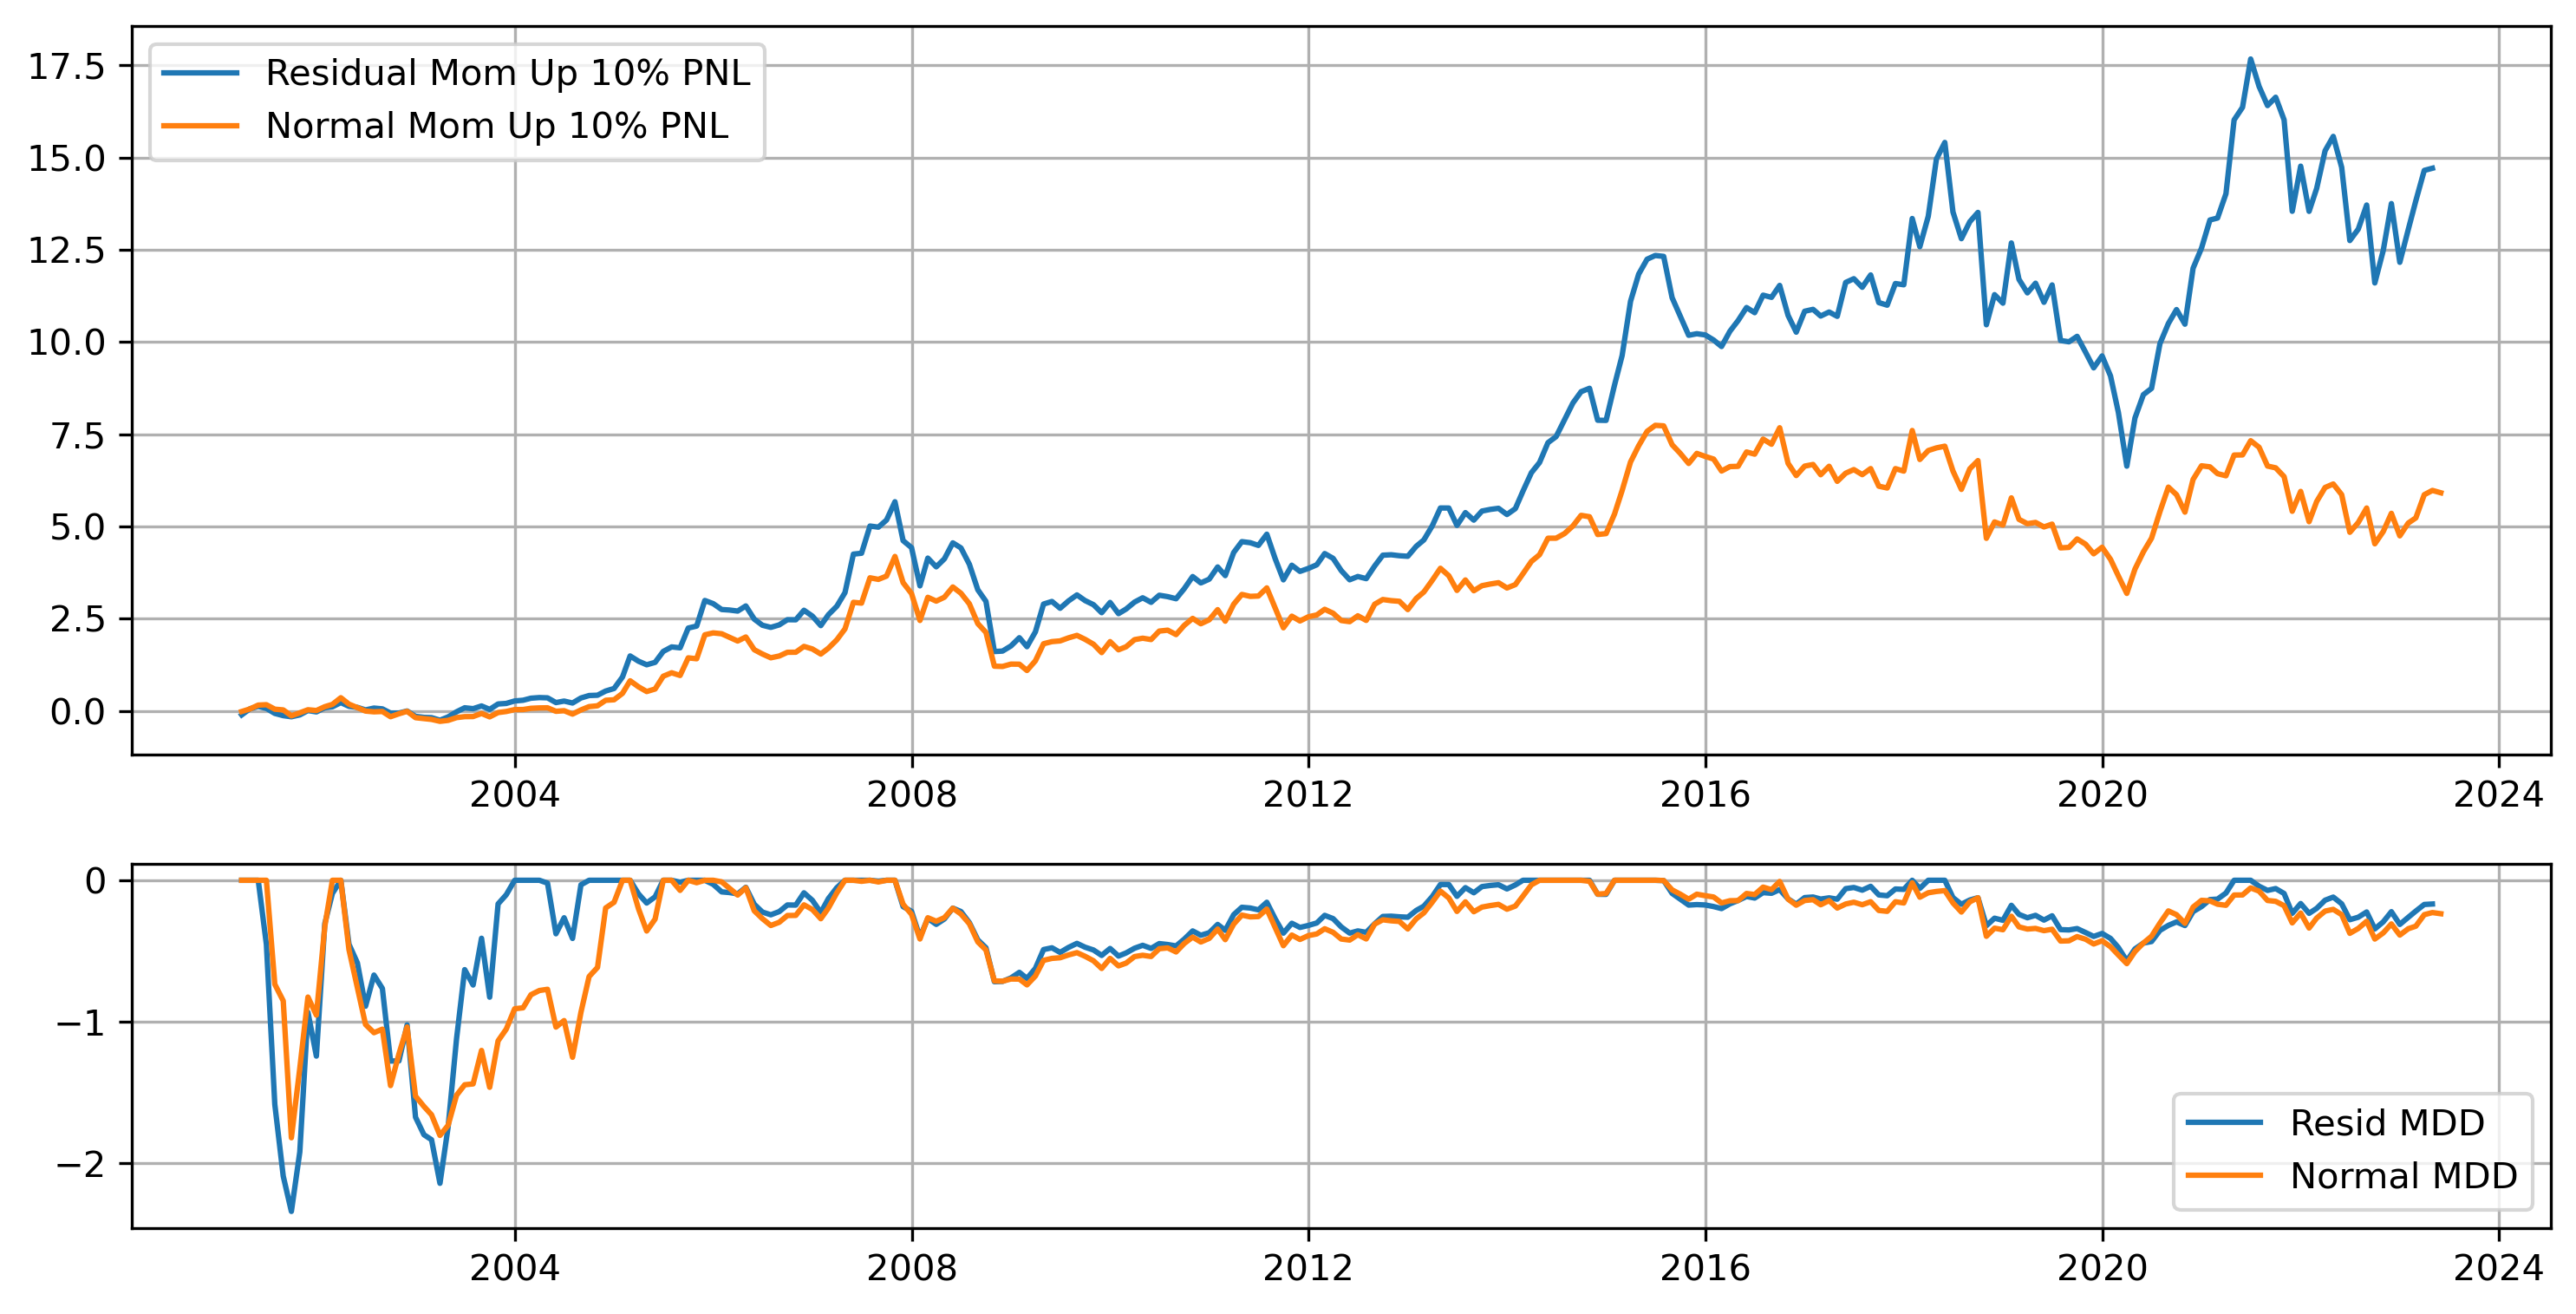

In [611]:
resid_mom_ret = pd.DataFrame(index=resid_mom_ret_date_list_1, data=resid_mom_ret_list_1, columns=['Residual Mom Return?']).dropna()

fig = plt.figure(figsize=(12,6), dpi=300)

spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 1])

ax0 = fig.add_subplot(spec[0])
ax0.plot((resid_mom_ret + 1).cumprod()-1, label='Residual Mom Up 10% PNL')
ax0.plot((mom_pnl.loc[resid_mom_ret.index[0]:, 'l_ret']+1).cumprod()-1, label='Normal Mom Up 10% PNL')
ax0.grid()
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.plot(cal_mdd(resid_mom_ret), label='Resid MDD')
ax1.plot(cal_mdd(mom_pnl.loc[resid_mom_ret.index[0]:, 'l_ret']), label='Normal MDD')
ax1.legend()
ax1.grid()

fig.show()


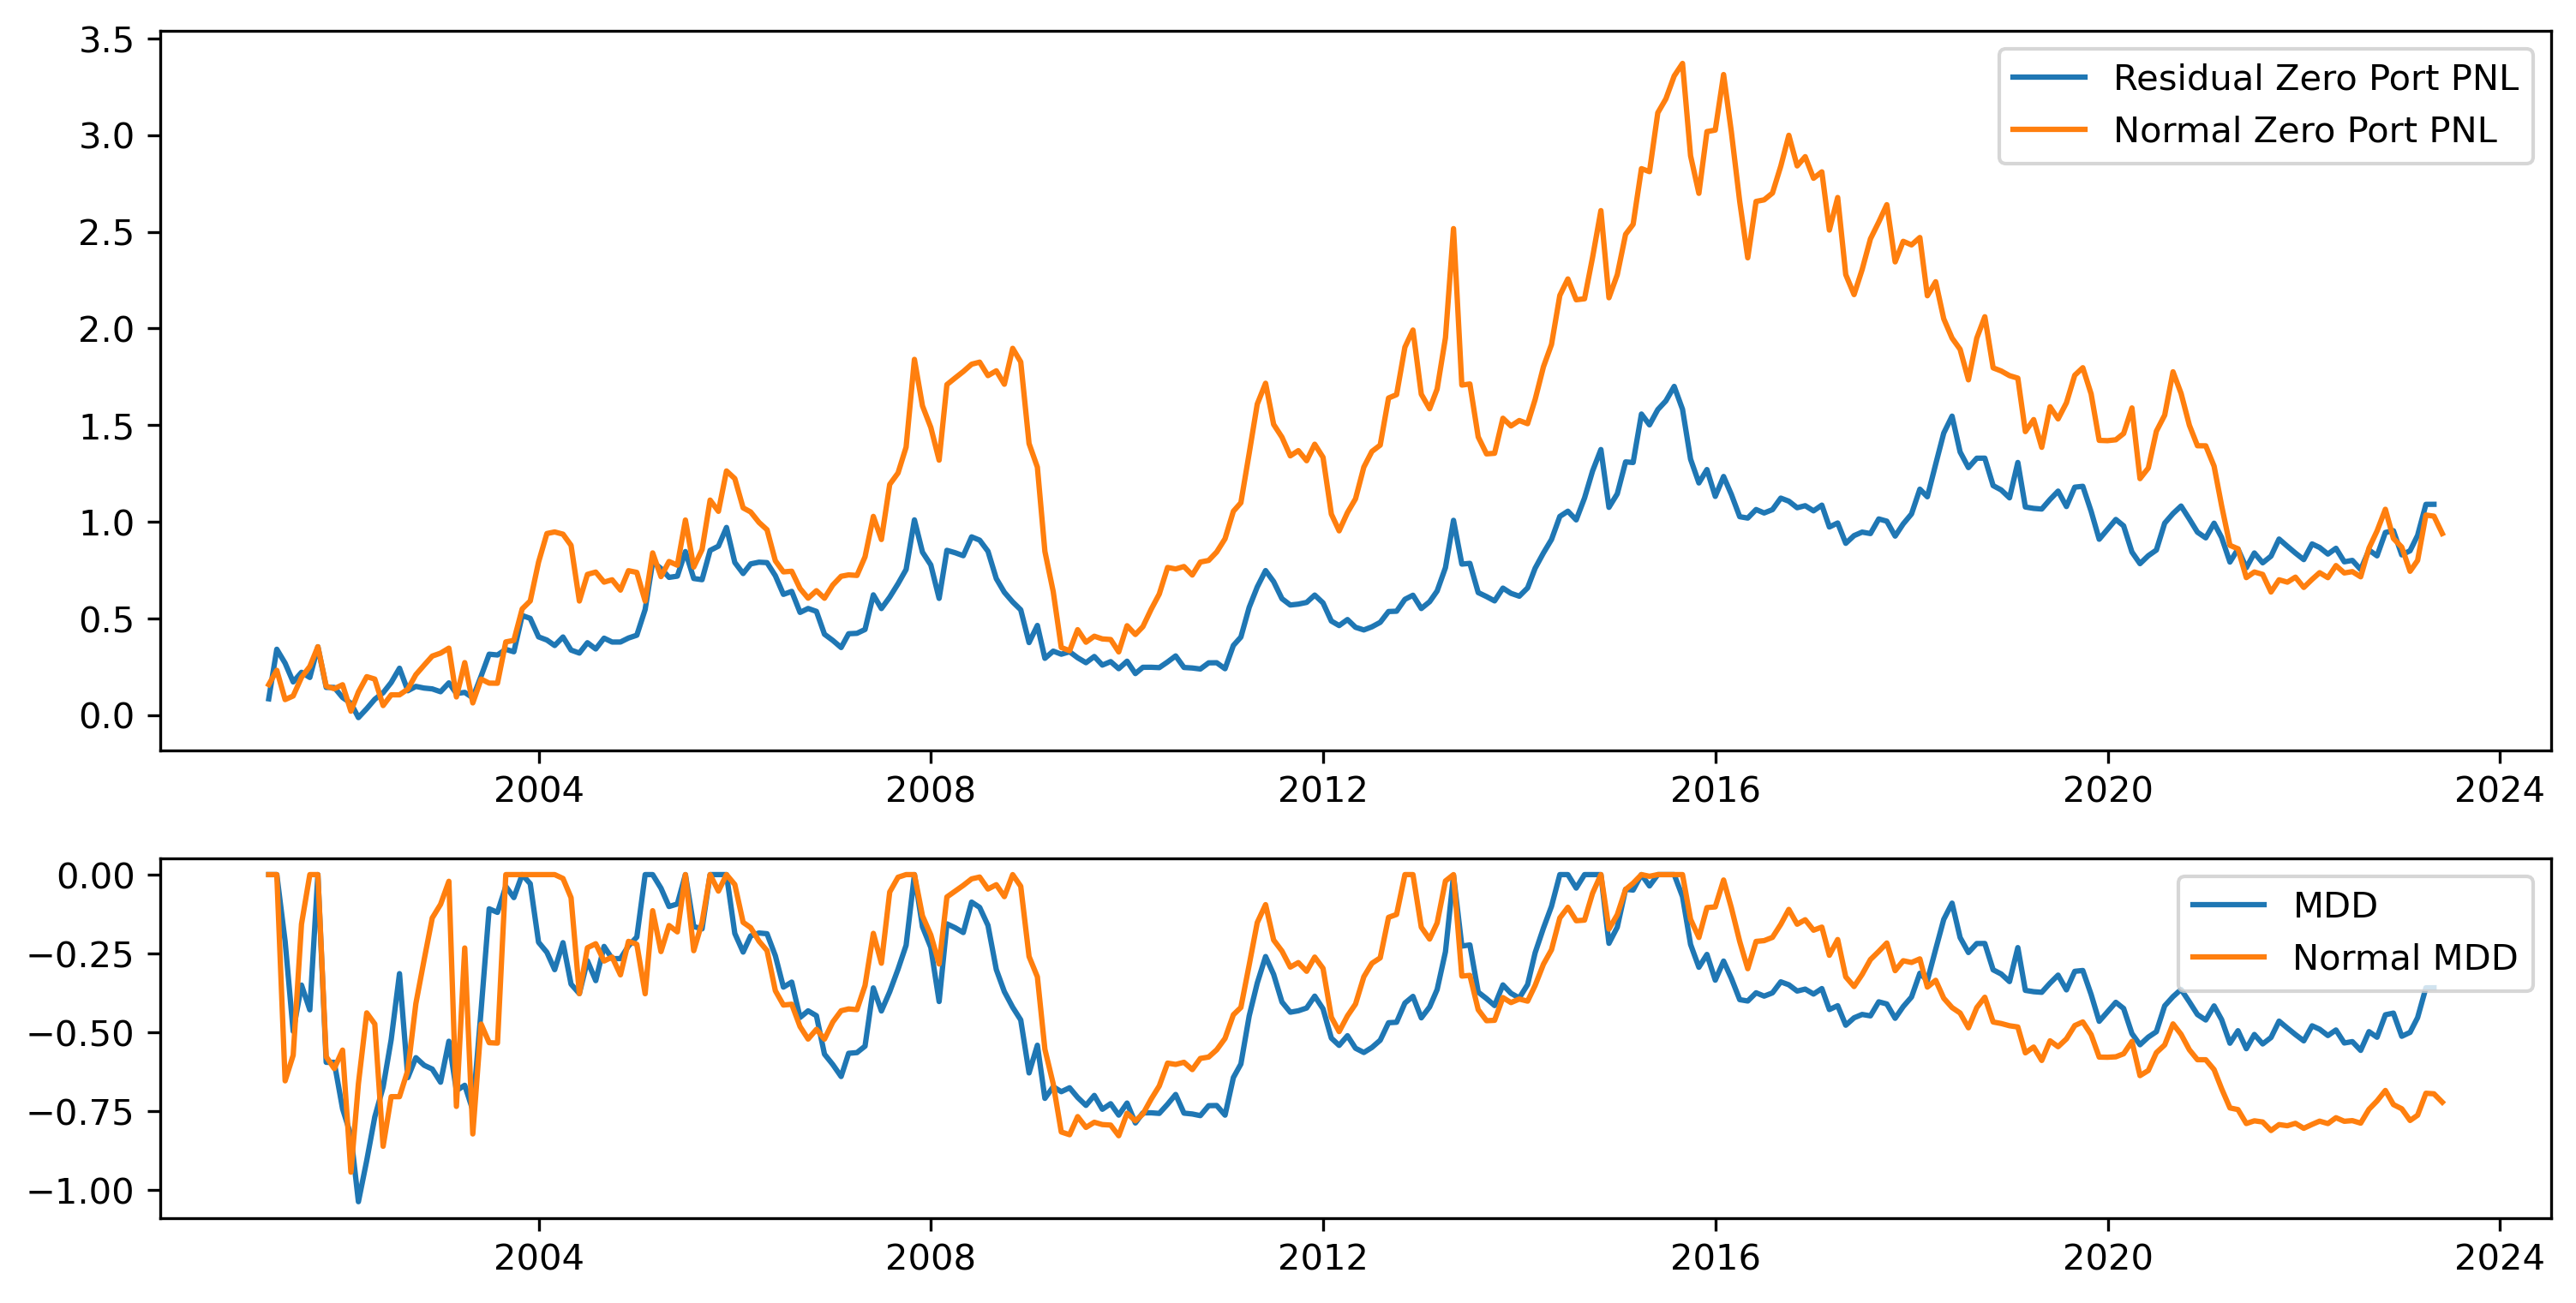

In [621]:
resid_mom_ret = pd.DataFrame(index=resid_mom_ret_date_list_1, data=resid_mom_ret_list_1, columns=['Residual Mom Return?']).dropna()

fig = plt.figure(figsize=(12,6), dpi=300)

spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 1])

ax0 = fig.add_subplot(spec[0])
ax0.plot((resid_mom_ret + 1).cumprod()-1, label='Residual Zero Port PNL')
ax0.plot((mom_pnl.loc[resid_mom_ret.index[0]:, 'mom_pnl']+1).cumprod()-1, label='Normal Zero Port PNL')
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.plot(cal_mdd(resid_mom_ret), label='MDD')
ax1.plot(cal_mdd(mom_pnl.loc[resid_mom_ret.index[0]:, 'mom_pnl']), label='Normal MDD')
ax1.legend()

fig.show()


<AxesSubplot:>

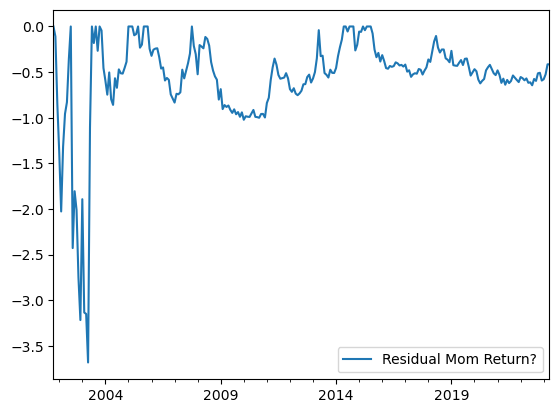

In [508]:
aa = resid_mom_ret

peak = np.maximum.accumulate(((1+aa).cumprod()-1))

((((1+aa).cumprod()-1) - peak)/abs(peak)).plot()

In [540]:
mom_ret_filtered = mom_ret.loc[resid_mom_ret.index[0]:]
monthly_ret_filtered = monthly_ret.loc[resid_mom_ret.index[0]:]

reg_table = pd.DataFrame(index=np.arange(0, 10)+1, columns=['CumRet', 'AnnRet(%)', 'AnnStd(%)', 'sharpe'])

for decile_num, x in tqdm(enumerate(zip(np.linspace(0, 1, 11)[:-1][::-1], np.linspace(0, 1, 11)[1:][::-1]))):
    
    decile_num = decile_num+1
    low_line, up_line = x[0], x[1]
    
    pnl_ret_list  = []
    ivst_idx_list = []
    long_tick_list = []
    short_tick_list = []
    s_ret_list = []
    l_ret_list = []

    for num in range(len(mom_ret_filtered)-1):
        series = mom_ret_filtered.iloc[num]

        date_idx = series.name
        ivst_idx = monthly_ret_filtered.index[np.where(monthly_ret_filtered.index==date_idx)[0][0] + 1]

        long_tick = series[(series > series.quantile(low_line)) & (series <= series.quantile(up_line))].index.to_list()
        short_tick = series[series < series.quantile(0.1)].index.to_list()
        #short_tick = series[series < series.quantile(0.2)].index.to_list()

        long_ret = monthly_ret_filtered.loc[ivst_idx, long_tick].mean()
        short_ret = monthly_ret_filtered.loc[ivst_idx, short_tick].mean()
            
        pnl_ret = long_ret - 0 #- short_ret
            
        pnl_ret_list.append(pnl_ret)
        ivst_idx_list.append(ivst_idx)
        long_tick_list.append(long_tick)
        short_tick_list.append(short_tick)
        s_ret_list.append(short_ret)
        l_ret_list.append(long_ret)
        

    mom_pnl_filtered = pd.DataFrame(index=ivst_idx_list, \
                        data=pd.DataFrame([pnl_ret_list, long_tick_list, short_tick_list, s_ret_list, l_ret_list]).T.values,\
                        columns=['mom_pnl', 'long_idx', 'short_idx', 's_ret', 'l_ret'])

    cum_ret = ((mom_pnl_filtered.iloc[:,0]+1).cumprod()-1)[-1]
    ann_ret = np.round(mom_pnl_filtered.iloc[:,0].mean() * 12 * 100, 2)
    ann_std = np.round(mom_pnl_filtered.iloc[:,0].std() * np.sqrt(12) * 100, 2)
    
    #sharpe = ((mom_pnl_filtered.iloc[:,[0]] - rf.loc[mom_pnl_filtered.index].apply(lambda x: x/12).to_numpy()).mean()/mom_pnl_filtered.iloc[:,[0]].std()).item()
    
    # reg_table.loc[decile_num, ['CumRet', 'AnnRet(%)', 'AnnStd(%)', 'sharpe']] = [cum_ret, ann_ret, ann_std, sharpe]
    reg_table.loc[decile_num, ['CumRet', 'AnnRet(%)', 'AnnStd(%)']] = [cum_ret, ann_ret, ann_std]

10it [00:03,  2.85it/s]


In [541]:
reg_table

,CumRet,AnnRet(%),AnnStd(%),sharpe
1,6.308238,13.16,27.94,NaN
2,12.037492,14.65,23.23,NaN
3,35.197474,19.32,22.79,NaN
4,39.364297,19.89,23.21,NaN
5,20.515527,16.6,21.46,NaN
6,12.381626,14.23,20.72,NaN
7,12.183648,14.45,22.05,NaN
8,11.881454,14.74,23.83,NaN
9,6.626096,12.44,24.39,NaN
10,0.6542,6.87,30.04,NaN


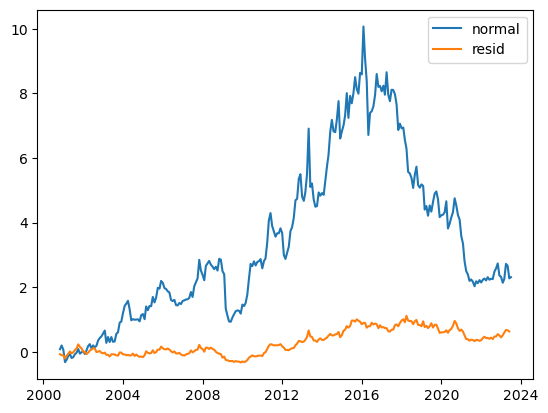

In [632]:
plt.plot(((mom_pnl.iloc[24:,0].loc[resid_mom_ret.iloc[24:].index[0]:]+1).cumprod()-1), label='normal')
plt.plot((resid_mom_ret.iloc[24:] + 1).cumprod()-1, label='resid')
plt.legend()

# Residual Momentum Strategy Performance 차트

In [543]:
resid_standard.head()

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000110,...,383220,383800,402340,403550,446070,450140,452260,453340,456040,457190
2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [544]:
performance_columns = ['CumRet', 'AnnRet(%)', 'AnnVol(%)', 'Sharpe']
residual_mom_reg = pd.DataFrame(columns=performance_columns, index=np.arange(0, 10, 1)+1)

for decile_num, x in tqdm(enumerate(zip(np.linspace(0, 1, 11)[:-1][::-1], np.linspace(0, 1, 11)[1:][::-1]))):
    
    decile_num = decile_num+1
    low_line, up_line = x[0], x[1]

    residual_mom_port_list      = []
    residual_mom_port_list_date = []
    #top_resid_num = []

    monthly_resid = resid_standard.iloc[np.where(resid_standard.sum(axis=1) != 0)].iloc[:-1]
    monthly_ret = m_ret.iloc[:-1]

    for sig_index in tqdm(monthly_resid.index[:-1]):
        
        '''시그널 날짜'''
        sig_index = sig_index
        
        '''투자 수익률 날짜'''
        invest_index = monthly_ret.index[np.where(monthly_ret.index == sig_index)[0] + 1][0]
        
        '''편의를 위해'''
        series = monthly_resid.loc[sig_index]
        '''종목 선정'''
        long_tick   = series[(series>=series.quantile(low_line)) & (series<series.quantile(up_line))].index
        #short_tick  = series[series<=series.quantile(0.1)].index

        '''수익률 (eq weight)'''
        long_ret    = m_ret.loc[invest_index, long_tick].mean()
        short_ret   = m_ret.loc[invest_index, short_tick].mean()

        '''mom_port_ret'''
        mom_port_ret = long_ret #- short_ret

        '''저장'''
        residual_mom_port_list_date.append(invest_index)
        residual_mom_port_list.append(mom_port_ret)

        '''이외 디버깅'''
        #top_resid_num.append(len(long_tick))

    '''PNL'''        
    resid_mom_ret = pd.DataFrame(index=residual_mom_port_list_date, data=residual_mom_port_list, columns=['Residual Mom Return?']).dropna()

    '''CumRet'''
    cum_ret = ((resid_mom_ret+1).cumprod()-1).iloc[-1].item()
    '''MeanRet (Annual)'''
    ann_ret = np.round( resid_mom_ret.mean().item() * 12 * 100 , 2)
    '''MeanVol (Annual)'''
    ann_vol = np.round( resid_mom_ret.std().item() * np.sqrt(12) * 100 , 2)
    '''Ann_Sharpe'''
    ann_shp = ( pd.concat([resid_mom_ret, rf], axis=1).dropna().apply(lambda x : x[0] - x[1]/12, axis=1).mean() * 12 ) / (pd.concat([resid_mom_ret, rf], axis=1).dropna().apply(lambda x : x[0] - x[1]/12, axis=1).std() * np.sqrt(12))

    residual_mom_reg.loc[decile_num] = [cum_ret, ann_ret, ann_vol, ann_shp]
    
residual_mom_reg


100%|██████████| 259/259 [00:00<00:00, 983.61it/s]
10it [00:03,  2.94it/s]


,CumRet,AnnRet(%),AnnVol(%),Sharpe
1,17.484305,17.38,27.5,0.524621
2,26.386988,18.84,26.26,0.604903
3,17.422534,16.84,25.63,0.541527
4,13.69953,15.48,24.28,0.515704
5,17.690121,16.53,24.13,0.562654
6,15.371452,15.6,22.66,0.557812
7,11.772201,14.34,22.12,0.514506
8,8.748762,13.11,22.39,0.453314
9,11.349392,14.45,23.55,0.488388
10,9.557035,13.67,23.21,0.461294


In [330]:
def cal_mdd (ret_df):
    
    cum = ((ret_df+1).cumprod()-1)
    p = np.maximum.accumulate(cum)
    dd = (cum-p)/abs(p)
    return dd

<AxesSubplot:>

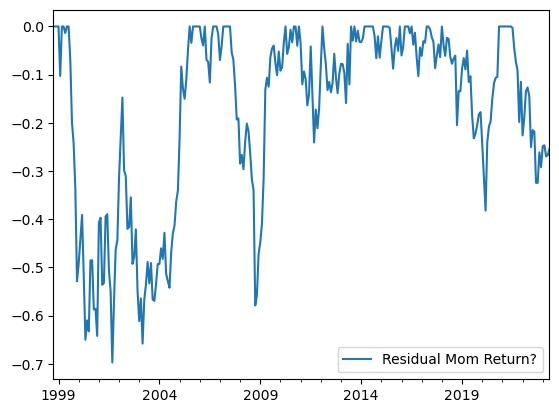

In [333]:
cal_mdd(resid_mom_ret).plot()

In [81]:
np.round( resid_mom_ret.mean().item() * 12 * 100 , 2)

18.15